In [1]:
from clustering import *
from utils import *

In [2]:

#df of log returns
df_60m = pd.read_parquet("data/clean/60m/data_clean_60m_log_ret.parquet")

In [3]:
#Rolling clustering for 5m dataset


#Cluster tickers

#Compute T=3*N
N = df_60m.shape[1]
T = N // 3

#Number of windows possible
lag_max = df_60m.shape[0] - T
liste = RolledCluster(df_60m, T, "louvain_cluster/date/60m", True, False, lag_max)

In [4]:
liste_cluster = dask.compute(dask.compute(liste))[0][0]
#liste_cluster

In [5]:
number_of_clusters = []
for element in liste_cluster:
    number_of_clusters.append(len(element["Cluster"].unique()))

In [6]:
df_n_clusters = pd.DataFrame(number_of_clusters, columns=['Clusters'])
df_n_clusters["Datetime"] = df_60m[-len(df_n_clusters):].index

In [7]:
df_n_clusters

,Clusters,Datetime
0,6,2020-03-04 11:30:00-05:00
1,6,2020-03-04 12:30:00-05:00
2,5,2020-03-04 13:30:00-05:00
3,7,2020-03-04 14:30:00-05:00
4,5,2020-03-04 15:30:00-05:00
...,...,...
3347,2,2022-01-26 14:30:00-05:00
3348,2,2022-01-26 15:30:00-05:00
3349,2,2022-01-27 09:30:00-05:00
3350,2,2022-01-27 10:30:00-05:00


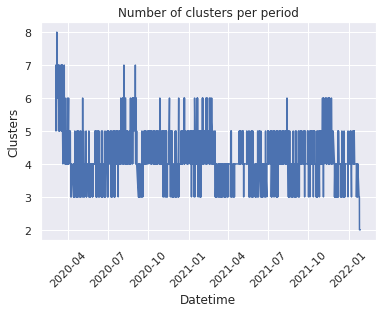

In [20]:
plot(df_n_clusters, x="Datetime", y="Clusters", title='Number of clusters per period', save_name='Plot_number_clusters_days_60m')

In [9]:
df_n_clusters["ARI"] = [1] + RolledARI(liste_cluster)

100%|██████████| 3351/3351 [00:08<00:00, 415.32it/s]


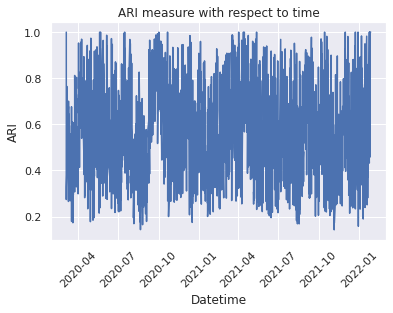

In [21]:
plot(df_n_clusters, x="Datetime", y="ARI", title='ARI measure with respect to time', save_name='Plot_ARI_days_60m')

In [11]:
liste_cluster[-1].value_counts()

Cluster
1          126
0           42
dtype: int64

In [12]:
dfj = df_60m.join(liste_cluster[-1], how='inner')

In [13]:
dfj

,SBUX,ISRG,KIM,QCOM,GL,WFC,CRM,STT,WMT,AON,...,EFX,HII,APD,O,DPZ,ETN,CNC,TFC,GE,Cluster
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-12-22 12:30:00-05:00,0.000000,0.004579,0.005079,-0.001305,0.006547,-0.000104,-0.001746,0.001813,0.003236,0.003098,...,-0.000907,-0.000634,-0.001553,0.003438,-0.001626,0.002125,0.002422,0.002799,0.001443,1
2021-12-22 13:30:00-05:00,-0.001211,0.001267,-0.006778,-0.003842,-0.002490,-0.003238,-0.002506,-0.007652,0.002361,-0.002842,...,0.002043,-0.003065,-0.001319,-0.000693,0.001813,-0.003894,-0.003790,-0.004668,-0.006142,1
2021-12-22 14:30:00-05:00,0.001883,0.003652,-0.001276,0.008832,0.001093,0.003226,0.004411,0.000433,-0.000036,0.002043,...,0.002021,-0.004268,0.001825,0.001536,-0.002262,0.000540,0.001665,0.004755,0.000574,1
2021-12-22 15:30:00-05:00,0.000939,0.004549,0.001913,0.002982,0.002838,0.001784,0.002337,0.001189,-0.000822,-0.000051,...,0.004383,0.001942,0.003607,0.001303,0.001552,0.000720,0.002492,0.001571,-0.000430,1
2021-12-23 09:30:00-05:00,0.008642,0.002838,0.001274,0.006978,0.010839,0.005399,-0.008661,0.007232,-0.003727,0.000170,...,0.010665,0.008281,0.007910,-0.001447,0.023366,0.013104,0.002448,0.005912,0.008770,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-26 14:30:00-05:00,-0.025384,-0.031611,-0.026317,-0.034022,-0.014465,-0.013396,-0.024054,-0.026997,-0.011085,-0.017708,...,-0.034664,-0.018608,-0.017182,-0.023925,-0.020746,-0.017236,-0.025104,-0.022172,-0.023210,1
2022-01-26 15:30:00-05:00,0.004773,0.001364,0.000833,0.001832,0.000390,0.008705,-0.004510,0.007985,0.001549,0.003709,...,0.009939,0.003452,0.001742,0.000442,-0.008430,0.001013,0.006801,0.013776,0.007311,1
2022-01-27 09:30:00-05:00,0.004802,0.007827,0.003325,-0.004561,0.004908,0.008264,0.040331,0.010234,0.016810,-0.002134,...,0.002381,0.003067,0.008056,0.010111,0.005730,0.007627,0.016213,0.006027,0.012363,1


In [14]:
dfj = dfj.groupby(by='Cluster').mean().T

In [15]:
asset_details = pd.read_csv('tickers/s&p.csv', index_col=0)
asset_details

,Name,Sector
Symbol,,
MMM,3M,Industrials
AOS,A. O. Smith,Industrials
ABT,Abbott Laboratories,Health Care
ABBV,AbbVie,Health Care
ABMD,Abiomed,Health Care
...,...,...
YUM,Yum! Brands,Consumer Discretionary
ZBRA,Zebra Technologies,Information Technology
ZBH,Zimmer Biomet,Health Care


In [16]:
dfj = dfj.join(asset_details[['Sector']], how='inner')
dfj

,0,1,Sector
SBUX,0.0,-0.001140,Consumer Discretionary
ISRG,0.0,-0.002271,Health Care
KIM,0.0,0.000211,Real Estate
QCOM,0.0,-0.000660,Information Technology
GL,0.0,0.001046,Financials
...,...,...,...
DPZ,0.0,-0.001732,Consumer Discretionary
ETN,0.0,-0.000358,Industrials
CNC,0.0,-0.000732,Health Care
TFC,0.0,0.000841,Financials


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

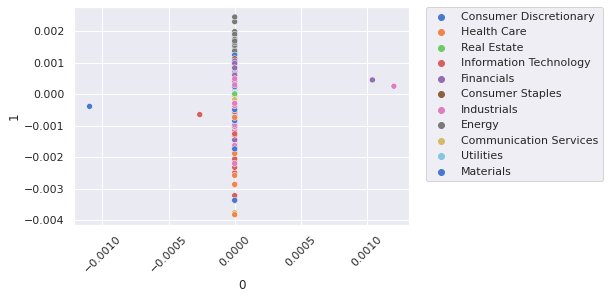

In [18]:
ax = sns.scatterplot(data=dfj, x=0, y=1, hue='Sector', palette='muted')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

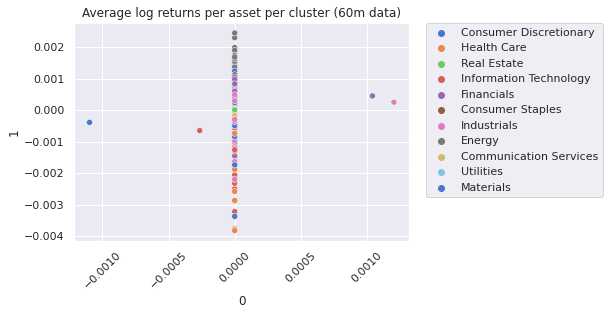

In [19]:
plot_scatter(df=dfj, x=0, y=1, hue='Sector', title='Average log returns per asset per cluster (60m data)')